In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import io

사실 crop resize 다 라이브러리가 있음

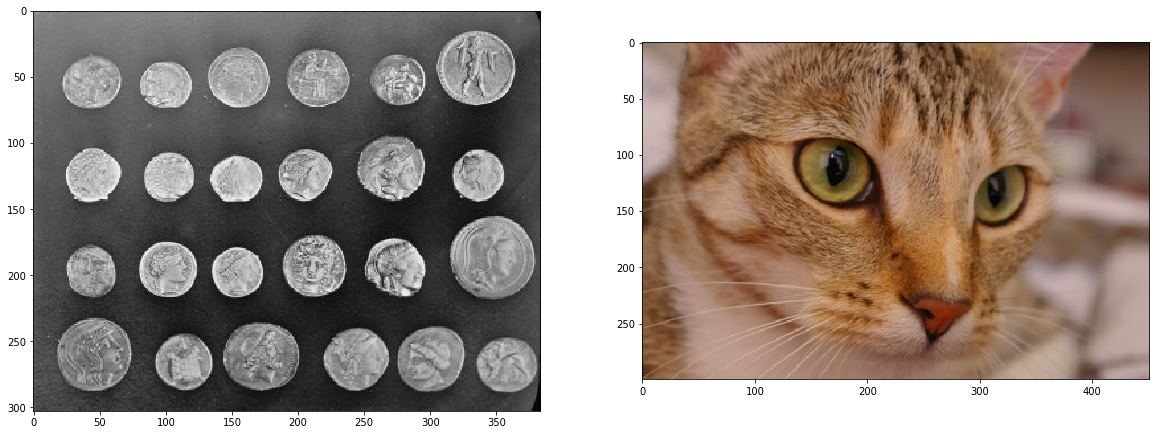

In [25]:
cat = data.chelsea() #해상도가 같게 만들기(크기)
coins = data.coins()

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(coins, cmap='gray')
ax1.imshow(cat)

# 지정한 크기로 이미지 가운데 crop

303 384
51 42
200 300
251 342


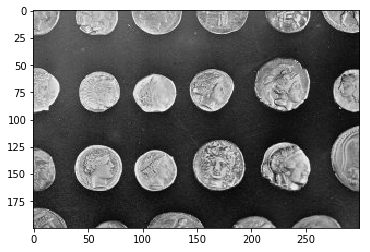

In [26]:
def crop_center_gray(img,cropy, cropx):
    y,x = img.shape
    print(y,x)
    starty = y//2 - cropy//2 #시작위치
    startx = x//2 - cropx//2
    print(starty, startx)
    print(cropy, cropx)
    endy = starty + cropy
    endx = startx + cropx
    print(endy, endx)
    return img[starty:endy, startx:endx]
    
coins_ccrop = crop_center_gray(coins, 200, 300)
plt.imshow(coins_ccrop, cmap='gray')

# 위에꺼 color 이미지로 해보기

300 451


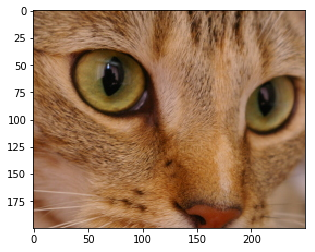

In [27]:
def crop_center_rgb(img,cropy,cropx):
    y,x,z = img.shape #3차원임
    print(y, x)
    starty = y//2 - cropy//2 #시작위치
    startx = x//2 - cropx//2
    endy = starty + cropy
    endx = startx + cropx
    return img[starty:endy, startx:endx]

cat_ccrop = crop_center_rgb(cat, 200, 250)
plt.imshow(cat_ccrop)

# gray, rgb color 상관 없이 가운데 crop 되게

(200, 250)
303 384
(200, 250)
300 451


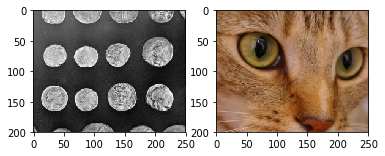

In [28]:
import operator

def crop_nd(img, bounding):
    print(bounding)
    y,x,*z = img.shape #3차원임 *은 포인터변수(c에서) / 파이썬에는 포인터가 없음 /
    #*값을 초기화 할 수도 있고 안할 수도 있다.
    #그래서 *은 쓸지말지
    print(y, x)
    starty = y//2 - bounding[0]//2 #시작위치
    startx = x//2 - bounding[1]//2
    endy = starty + bounding[0]
    endx = startx + bounding[1]
    return img[starty:endy, startx:endx]

fig, (ax0, ax1) = plt.subplots(1,2)
coins_crop_nd = crop_nd(coins, (200, 250))
ax0.imshow(coins_crop_nd, cmap='gray')

cat_crop_nd = crop_nd(cat, (200, 250))
ax1.imshow(cat_crop_nd)

[[ 47 123 133 ...  14   3  12]
 [ 93 144 145 ...  12   7   7]
 [126 147 143 ...   2  13   3]
 ...
 [ 81  79  74 ...   6   4   7]
 [ 88  82  74 ...   5   7   8]
 [ 91  79  68 ...   4  10   7]]
(51, 67)
(251, 317)
[[[143 120 104]
  [143 120 104]
  [141 118 102]
  ...
  [ 45  27  13]
  [ 45  27  13]
  [ 45  27  13]]

 [[146 123 107]
  [145 122 106]
  [143 120 104]
  ...
  [ 46  29  13]
  [ 45  29  13]
  [ 47  30  14]]

 [[148 126 112]
  [147 125 111]
  [146 122 109]
  ...
  [ 48  28  17]
  [ 49  29  18]
  [ 50  30  19]]

 ...

 [[ 92  58  30]
  [105  71  43]
  [132  98  71]
  ...
  [172 145 138]
  [172 145 138]
  [172 145 138]]

 [[128  92  60]
  [139 103  71]
  [134  95  64]
  ...
  [166 142 132]
  [166 142 132]
  [167 143 133]]

 [[139 103  71]
  [127  88  57]
  [125  86  53]
  ...
  [161 137 127]
  [161 137 127]
  [162 138 128]]]
(50, 100)
(250, 350)


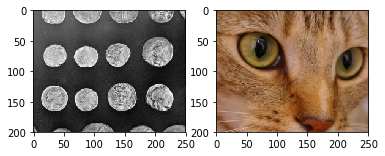

In [29]:
import operator

def crop_nd(img, bounding):
    print(img)
    start = tuple(map(lambda a, da : a//2 - da//2, img.shape, bounding))
    print(start)
    end = tuple(map(operator.add, start, bounding))
    print(end)
    slices = tuple(map(slice, start, end))
    return img[slices]
    #return img[start[0]:end[0], start[1]:end[1]]

fig, (ax0, ax1) = plt.subplots(1,2)
coins_crop_nd = crop_nd(coins, (200, 250))
ax0.imshow(coins_crop_nd, cmap='gray')

cat_crop_nd = crop_nd(cat, (200, 250))
ax1.imshow(cat_crop_nd)

#image가 2개니까

tuple
캐스팅하는거(형변환)

map(함수가 들어감(fun), 변수1(iter1), 변수2(iter2))
iter1 o o o o
iter2 o o o o
      1 2 3 4
1세로가 fun에 들어감


lambda
한줄짜리 함수

slice
알아서 잘라줌

import operator
operator.add 

lambda a, b, e: a + b / e
#딱히 쓸일이 없을때 / 일회용

shape 300, 451, 3
bounding 200, 250

map실행하면 30-200
451 - 250
3은 뒤에 인자가 없어서 패스

operator.add 는 진짜 그냥 더하기
굳이쓰는 이유 >> 

def some(a,b, op):
    

start = tuple(map(lambda a, da : a//2 - da//2, img.shape, bounding))
end = tuple(map(operator.add, start, bounding))
slices = tuple(map(slice, start, end))
return img[slices]



def some(a,b, op):
    return a+b

some(2,3,+) #기호에 따라 바뀌는 함수를 만들었다치면
+ - / * 이 기호들을 넘겨줄수 없어서

def some(a,b, op)
    return op(a,b)

some(2,3,oerator.add) 인자로써 쓰게 하려고


In [30]:
a = [1,2]
b = [3,4]
tu = tuple(map(lambda a, b: a+b, a, b))
print(tu)

(4, 6)


In [31]:
list = [1,2] #list
type(list)
type(tuple(list))
print(list)
type(list)
abc = (1,2)
type(abc) #형변환임

data = [1,2]
x = np.array(data)
tuple(x)
type(x)

[1, 2]


numpy.ndarray

# heigt width 중 작은 크기에 맞춰 정사각형center crop

303 384
303 384
(303, 303)
300 451
300 451
(300, 300, 3)


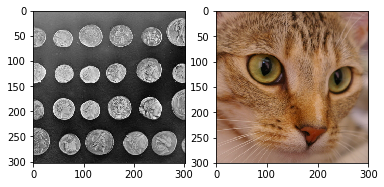

In [37]:
def crop_sq(img):
    y,x,*z = img.shape #3차원임 *은 포인터변수(c에서) / 파이썬에는 포인터가 없음 /
    #*값을 초기화 할 수도 있고 안할 수도 있다.
    #그래서 *은 쓸지말지
    size = min(img.shape[0], img.shape[1])
    print(y, x)
    starty = y//2 - size//2 #시작위치
    startx = x//2 - size//2
    endy = starty + size
    endx = startx + size
    return img[starty:endy, startx:endx]


fig, (ax0, ax1) = plt.subplots(1,2)
ax0.imshow(crop_sq(coins), cmap='gray')
print(crop_sq(coins).shape)
ax1.imshow(crop_sq(cat))
print(crop_sq(cat).shape)

303 384
303 384
(303, 303)
300 451
300 451
(300, 300, 3)


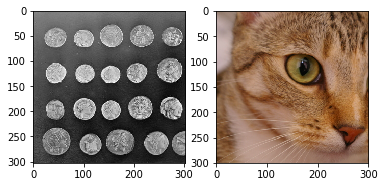

In [33]:
def crop_sq(img):
    y,x,*z = img.shape 
    size = y if y < x else z
    print(y, x)
    start = np.array([y//2, size//2]) - size//2 #시작위치
    #브로드캐스팅
    end = start + size
    slices = tuple(map(slice, start, end))
    return img[slices]
#size = y if y < x else z
#참일때 y실행 아니면 z

fig, (ax0, ax1) = plt.subplots(1,2)
ax0.imshow(crop_sq(coins), cmap='gray')
print(crop_sq(coins).shape)
ax1.imshow(crop_sq(cat))
print(crop_sq(cat).shape)

# 이미지 여러장 로드해서 정사각형 crop & 같은 사이즈로 resize

<class 'skimage.io.collection.ImageCollection'> 

 ['./apple\\image_apple_8.jpg', './apple\\image_apple_9.jpg', './apple\\image_apple_10.jpg', './apple\\image_apple_13.jpg', './apple\\image_apple_14.jpg', './apple\\image_apple_18.jpg']
1204 1595
(100, 100, 3)
936 960


C:\Users\haedal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(100, 100, 3)
195 300
(100, 100, 3)
810 1188
(100, 100, 3)
2083 4792
(100, 100, 3)
358 538
(100, 100, 3)


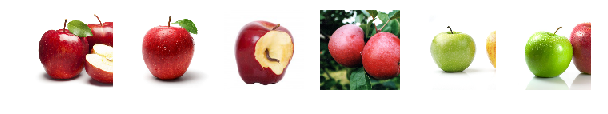

In [34]:
from skimage.transform import resize

ic = io.imread_collection('./apple/*.jpg')
ic = ic[:10] #10개로 자름

print(type(ic), '\n\n', ic)

f, axes = plt.subplots(nrows=1, ncols=len(ic), figsize=(10, 10))

label = 'apple'
path = "./imageData/" + label + '/'

for i, image in enumerate(ic):
    c_image = crop_sq(image)
    cr_image = resize(c_image, (100, 100)) #사이즈 100,100 / 비율을 보존하려고 먼저 정사각형 > 후에 resize
    
    axes[i].imshow(cr_image, cmap='gray')
    axes[i].axis('off')
    print(np.shape(cr_image))
    
    file_name = path + 'c_image' + str(i) + '.jpg'
    plt.imsave(file_name, cr_image, cmap=plt.cm.gray)

plt.savefig('collection.jpg') #전체이미지